<a href="https://colab.research.google.com/github/jefersonfreittas1/Python-Tutorial/blob/main/exercinos%20novos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método da bissecção**

O volume molar encontrado é: 0.001553 m³/mol


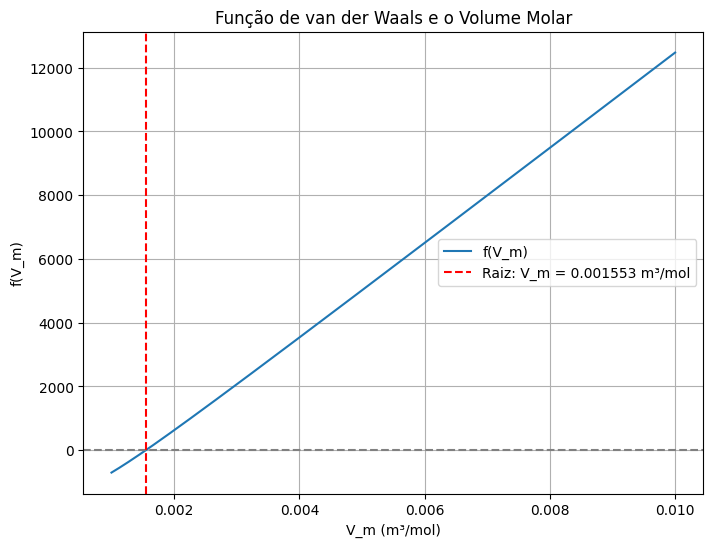

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as constantes
P = 1.5e6  # Pa
T = 300  # K
R = 8.314  # J/mol·K
a = 0.364  # Pa·m^6/mol^2
b = 4.27e-5  # m^3/mol

# Definindo a equação de van der Waals como uma função de V_m
def f(V_m):
    return (P + a / V_m**2) * (V_m - b) - R * T

# Função para o método da bissecção
def bisseccao(f, a, b, tol=1e-6):
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError("A função deve ter sinais opostos em a e b.")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        fc = f(c)

        if fc == 0:
            return c
        elif fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b) / 2

# Intervalo inicial para V_m
V_m_min = 0.001
V_m_max = 0.01

# Encontrando o volume molar usando a bissecção
V_m_root = bisseccao(f, V_m_min, V_m_max)

print(f"O volume molar encontrado é: {V_m_root:.6f} m³/mol")

# Plotando a função f(V_m)
V_m_values = np.linspace(V_m_min, V_m_max, 500)
f_values = f(V_m_values)

plt.figure(figsize=(8, 6))
plt.plot(V_m_values, f_values, label='f(V_m)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(V_m_root, color='red', linestyle='--', label=f'Raiz: V_m = {V_m_root:.6f} m³/mol')
plt.xlabel('V_m (m³/mol)')
plt.ylabel('f(V_m)')
plt.title('Função de van der Waals e o Volume Molar')
plt.legend()
plt.grid(True)
plt.show()


**Método da secante**
Calcule de forma analítica e depois calcule utilizando python
o volume de uma esfera é dada pela seguinte equação:
(pi*h^2*(3*R-h))/3 = V
Calcule o volume ocupado por um  líquido de altura (h) pelo método da secante:
dados:
h=??
R = 1
V = 0,5
h0 = 0,25 h1 = 0,5 (chutes iniciais)
|f(h)| < 0,002 (tolerância)

**solução analítica**

In [ ]:
#com gráfico
import numpy as np
import matplotlib.pyplot as plt

# Definir a função V(h) - Volume da esfera parcial
def f(h):
    R = 1  # Raio da esfera
    V = 0.5  # Volume desejado
    return (np.pi * h**2 * (3 * R - h)) / 3 - V

# Método da secante
def secante(f, h0, h1, tol=0.002, max_iter=100):
    for i in range(max_iter):
        f_h0 = f(h0)
        f_h1 = f(h1)

        if abs(f_h1) < tol:
            return h1

        # Fórmula da secante
        h_new = h1 - f_h1 * (h1 - h0) / (f_h1 - f_h0)

        # Atualiza valores para a próxima iteração
        h0, h1 = h1, h_new

        # Verificar a convergência
        if abs(f_h1) < tol:
            return h1

    raise ValueError("O método não convergiu dentro do número máximo de iterações")

# Chutes iniciais
h0 = 0.25
h1 = 0.5

# Executar o método da secante
h_sol = secante(f, h0, h1)

print(f"A altura do líquido é: {h_sol:.6f} m")

# Plotar a função f(h) no intervalo de interesse
h_values = np.linspace(0, 1, 500)  # Valores de h entre 0 e 1
f_values = f(h_values)

plt.figure(figsize=(8, 6))
plt.plot(h_values, f_values, label='f(h) = Volume calculado - Volume desejado')
plt.axhline(0, color='gray', linestyle='--')  # Linha horizontal para f(h) = 0
plt.axvline(h_sol, color='red', linestyle='--', label=f'Raiz: h = {h_sol:.6f} m')
plt.xlabel('h (m)')
plt.ylabel('f(h)')
plt.title('Função f(h) e Solução pelo Método da Secante')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#sem gráfico
import numpy as np

# Definir a função V(h) - Volume da esfera parcial
def f(h):
    R = 1  # Raio da esfera

    V = 0.5  # Volume desejado
    return (np.pi * h**2 * (3 * R - h)) / 3 - V

# Método da secante
def secante(f, h0, h1, tol=0.002, max_iter=100):
    for i in range(max_iter):
        f_h0 = f(h0)
        f_h1 = f(h1)

        if abs(f_h1) < tol:
            return h1

        # Fórmula da secante
        h_new = h1 - f_h1 * (h1 - h0) / (f_h1 - f_h0)

        # Atualiza valores para a próxima iteração
        h0, h1 = h1, h_new

        # Verificar a convergência
        if abs(f_h1) < tol:
            return h1

    raise ValueError("O método não convergiu dentro do número máximo de iterações")

# Chutes iniciais
h0 = 0.25
h1 = 0.5

# Executar o método da secante
h_sol = secante(f, h0, h1)

print(f"A altura do líquido é: {h_sol:.6f} m")


A altura do líquido é: 0.430450 m


**Exercício: Cálculo do Volume Molar de um Gás Utilizando o Método da Bissecção**

In [ ]:
#Com contagem de iterações
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função
def f(x):
    return x**2 + np.log(x)

# Implementação do método da bissecção com contagem de iterações
def bisseccao(f, a, b, tol=1e-6):
    if f(a) * f(b) > 0:
        raise ValueError("A função deve mudar de sinal no intervalo.")

    iter_count = 0  # Inicializando a contagem de iterações
    while (b - a) / 2 > tol:
        iter_count += 1
        c = (a + b) / 2
        if f(c) == 0:
            return c, iter_count
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, iter_count

# Definindo o intervalo para o método da bissecção
a, b = 0.5, 2  # Escolher intervalo onde a função muda de sinal
raiz, iteracoes = bisseccao(f, a, b)

# Plotando o gráfico da função
x_vals = np.linspace(0.5, 3, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 + ln(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(raiz, color='red', linestyle='--', label=f'Raiz ≈ {raiz:.6f}')
plt.title('Gráfico de f(x) = x^2 + ln(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo os resultados
print(f"A raiz aproximada da função é: {raiz:.6f}")
print(f"Número de iterações: {iteracoes}")
#A raiz aproximada da função é: 0.652918


In [ ]:
#Sem contagem de iterações
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função
def f(x):
    return x**2 + np.log(x)

# Implementação do método da bissecção
def bisseccao(f, a, b, tol=1e-6):
    if f(a) * f(b) > 0:
        raise ValueError("A função deve mudar de sinal no intervalo.")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Definindo o intervalo para o método da bissecção
a, b = 0.5, 2  # Escolher intervalo onde a função muda de sinal
raiz = bisseccao(f, a, b)

# Plotando o gráfico da função
x_vals = np.linspace(0.5, 3, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 + ln(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(raiz, color='red', linestyle='--', label=f'Raiz ≈ {raiz:.6f}')
plt.title('Gráfico de f(x) = x^2 + ln(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"A raiz aproximada da função é: {raiz:.6f}")
#A raiz aproximada da função é: 0.652918